<a href="https://colab.research.google.com/github/Herdvair/Grocery-Store-Sales/blob/main/Grocery_Store_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Grocery Store Sales Analysis

Bisnis ritel grocery store berupaya meningkatkan profit sekaligus memperkuat strategi pemasaran yang berbasis data. Dataset penjualan yang digunakan mencatat transaksi selama periode 2023 hingga 2025. Melalui data ini, dilakukan analisis menyeluruh yang mencakup pola transaksi pelanggan, variasi produk, dan performa tiap toko. Proses Exploratory Data Analysis (EDA) digunakan untuk menggali wawasan dari data tersebut, sehingga dapat menjadi dasar yang kuat dalam pengambilan keputusan bisnis strategis.

## Import Library

In [ ]:
import pandas as pd
import numpy as py
import matplotlib.pyplot as plt
import seaborn as sns


## Data Understanding & Feature Engineering

In [ ]:
df = pd.read_csv('/content/grocery_chain_data.csv')

In [ ]:
df.head(30)

,customer_id,store_name,transaction_date,aisle,product_name,quantity,unit_price,total_amount,discount_amount,final_amount,loyalty_points
0,2824,GreenGrocer Plaza,2023-08-26,Produce,Pasta,2.0,7.46,14.92,0.00,14.92,377
1,5506,ValuePlus Market,2024-02-13,Dairy,Cheese,1.0,1.85,1.85,3.41,-1.56,111
2,4657,ValuePlus Market,2023-11-23,Bakery,Onions,4.0,7.38,29.52,4.04,25.48,301
3,2679,SuperSave Central,2025-01-13,Snacks & Candy,Cereal,3.0,5.50,16.50,1.37,15.13,490
4,9935,GreenGrocer Plaza,2023-10-13,Canned Goods,Orange Juice,5.0,8.66,43.30,1.50,41.80,22
5,7912,Corner Grocery,2023-08-31,Dairy,Onions,3.0,25.04,75.12,1.77,73.35,316
6,1488,GreenGrocer Plaza,2023-10-18,Produce,Ground Beef,3.0,29.56,88.68,2.52,86.16,437
7,4582,City Fresh Store,2024-02-03,Health & Wellness,Orange Juice,2.0,11.73,23.46,0.00,23.46,107
8,9279,GreenGrocer Plaza,2024-11-16,Household Items,Apples,5.0,22.13,110.65,11.07,99.58,83
9,1434,QuickStop Market,2024-10-15,Health & Wellness,Onions,2.0,20.84,41.68,8.34,33.34,431


In [ ]:
def data_understanding(df : object) -> object:
    print('\n ===== Shape =====')
    print(df.shape)

    print('\n ===== Columns =====')
    print(df.columns)

    print('\n ===== Info =====')
    df.info()

    print('\n ===== Describe =====')
    print(df.describe())

    print('\n ===== Missing Value =====')
    print(df.isna().sum())

    print('\n ===== Duplicated Value =====')
    print(len(df.drop_duplicates())/len(df))

data_understanding(df)


 ===== Shape =====
(1980, 11)

 ===== Columns =====
Index(['customer_id', 'store_name', 'transaction_date', 'aisle',
       'product_name', 'quantity', 'unit_price', 'total_amount',
       'discount_amount', 'final_amount', 'loyalty_points'],
      dtype='object')

 ===== Info =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1980 entries, 0 to 1979
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       1980 non-null   int64  
 1   store_name        1955 non-null   object 
 2   transaction_date  1980 non-null   object 
 3   aisle             1980 non-null   object 
 4   product_name      1980 non-null   object 
 5   quantity          1980 non-null   float64
 6   unit_price        1980 non-null   float64
 7   total_amount      1980 non-null   float64
 8   discount_amount   1980 non-null   float64
 9   final_amount      1980 non-null   float64
 10  loyalty_points    1980 non-null   int64

In [ ]:
df['customer_id'] = df['customer_id'].astype(str)

**CEK DATA TIDAK KONSISTEN**

In [ ]:
for i in df.columns:
  print("========columns=========")
  display(df[i].value_counts())
  print("\n")

========columns=========


,count
customer_id,
8381,4
3290,3
8933,3
7658,3
5961,3
...,...
5896,1
1802,1
7492,1




========columns=========


,count
store_name,
City Fresh Store,235
SuperSave Central,232
ValuePlus Market,221
GreenGrocer Plaza,220
Corner Grocery,218
FamilyFood Express,215
MegaMart Westside,214
QuickStop Market,208
FreshMart Downtown,192




========columns=========


,count
transaction_date,
2023-10-18,11
2024-11-12,9
2023-09-11,9
2025-03-29,8
2024-02-15,8
...,...
2024-10-04,1
2024-08-19,1
2025-04-30,1




========columns=========


,count
aisle,
Beverages,195
Personal Care,192
Snacks & Candy,190
Canned Goods,190
Frozen Foods,188
Health & Wellness,183
Bakery,182
Household Items,175
Dairy,164




========columns=========


,count
product_name,
Chicken Breast,131
Onions,127
Tomatoes,126
Bread,121
Potatoes,118
Eggs,114
Salmon,113
Cereal,113
Orange Juice,112




========columns=========


,count
quantity,
1.0,416
3.0,399
2.0,391
4.0,388
5.0,386




========columns=========


,count
unit_price,
7.74,4
2.46,4
20.11,4
27.03,4
8.35,4
...,...
14.55,1
22.44,1
24.92,1




========columns=========


,count
total_amount,
31.80,4
4.02,4
36.50,3
22.05,3
10.40,3
...,...
62.90,1
34.92,1
87.70,1




========columns=========


,count
discount_amount,
0.00,340
2.13,9
1.72,8
2.74,8
4.02,8
...,...
10.64,1
9.33,1
2.29,1




========columns=========


,count
final_amount,
5.08,4
8.97,4
85.61,3
39.78,3
16.64,3
...,...
92.98,1
4.90,1
-0.56,1




========columns=========


,count
loyalty_points,
426,13
424,10
43,10
276,9
431,9
...,...
193,1
418,1
238,1


**IDENTIFIKASI MISSING VALUES**

In [ ]:
df[df.isna().any(axis=1)]

,customer_id,store_name,transaction_date,aisle,product_name,quantity,unit_price,total_amount,discount_amount,final_amount,loyalty_points
285,9445,NaN,2025-01-03,Canned Goods,Bread,5.0,29.82,149.10,14.91,134.19,478
385,2983,NaN,2025-04-16,Frozen Foods,Milk,2.0,15.34,30.68,3.07,27.61,57
389,9289,NaN,2024-12-21,Snacks & Candy,Cheese,4.0,3.38,13.52,2.03,11.49,274
418,7658,NaN,2024-08-20,Dairy,Milk,4.0,2.46,9.84,0.00,9.84,473
540,1472,NaN,2024-12-08,Household Items,Milk,5.0,25.44,127.20,3.20,124.00,154
604,1919,NaN,2024-03-21,Bakery,Yogurt,4.0,27.95,111.80,16.77,95.03,294
657,5835,NaN,2025-03-08,Health & Wellness,Cereal,1.0,2.72,2.72,0.00,2.72,330
740,6327,NaN,2024-05-28,Frozen Foods,Bread,3.0,9.70,29.10,1.46,27.64,281
868,8581,NaN,2024-10-30,Bakery,Bananas,1.0,16.60,16.60,2.58,14.02,228
1111,3762,NaN,2024-11-08,Bakery,Yogurt,4.0,7.77,31.08,0.00,31.08,300


In [ ]:
df.isnull().sum() / df.count()

,0
customer_id,0.000000
store_name,0.012873
transaction_date,0.000000
aisle,0.000000
product_name,0.000000
quantity,0.000000
unit_price,0.000000
total_amount,0.000000
discount_amount,0.000000
final_amount,0.000000


Note : Dilakukan dengan menambahkan kategori "Unknown" di kolom "store_name" karena tidak ada store_id dan menghindari data yang bias.



In [ ]:
df['store_name'].fillna('Unknown', inplace=True)

/tmp/ipython-input-3138890571.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['store_name'].fillna('Unknown', inplace=True)


In [ ]:
df[df.store_name == 'Unknown']

,customer_id,store_name,transaction_date,aisle,product_name,quantity,unit_price,total_amount,discount_amount,final_amount,loyalty_points
285,9445,Unknown,2025-01-03,Canned Goods,Bread,5.0,29.82,149.10,14.91,134.19,478
385,2983,Unknown,2025-04-16,Frozen Foods,Milk,2.0,15.34,30.68,3.07,27.61,57
389,9289,Unknown,2024-12-21,Snacks & Candy,Cheese,4.0,3.38,13.52,2.03,11.49,274
418,7658,Unknown,2024-08-20,Dairy,Milk,4.0,2.46,9.84,0.00,9.84,473
540,1472,Unknown,2024-12-08,Household Items,Milk,5.0,25.44,127.20,3.20,124.00,154
604,1919,Unknown,2024-03-21,Bakery,Yogurt,4.0,27.95,111.80,16.77,95.03,294
657,5835,Unknown,2025-03-08,Health & Wellness,Cereal,1.0,2.72,2.72,0.00,2.72,330
740,6327,Unknown,2024-05-28,Frozen Foods,Bread,3.0,9.70,29.10,1.46,27.64,281
868,8581,Unknown,2024-10-30,Bakery,Bananas,1.0,16.60,16.60,2.58,14.02,228
1111,3762,Unknown,2024-11-08,Bakery,Yogurt,4.0,7.77,31.08,0.00,31.08,300


In [ ]:
df.drop(df[df['final_amount'] < 0].index, inplace=True)

Note : Dilakukan penghapusan baris yang memiliki nilai (-) karena kurang masuk akal jika terdapat transaksi yang minus.

In [ ]:
df.isnull().sum() / df.count()

,0
customer_id,0.0
store_name,0.0
transaction_date,0.0
aisle,0.0
product_name,0.0
quantity,0.0
unit_price,0.0
total_amount,0.0
discount_amount,0.0
final_amount,0.0


Note: Tidak ada lagi missing value

In [ ]:
features = ['quantity','unit_price','total_amount','discount_amount', 'final_amount', 'loyalty_points']

def check_plot(df,features):

    for i in features:

    # tentukan ukuran gambar
        plt.figure(figsize=(20, 4))

        # histogram
        plt.subplot(1, 2, 1)
        sns.histplot(df[i], bins=30)
        plt.title('Histogram')

       # box plot
        plt.subplot(1, 2, 2)
        sns.boxplot(y=df[i])
        plt.title('Boxplot')

        plt.show()

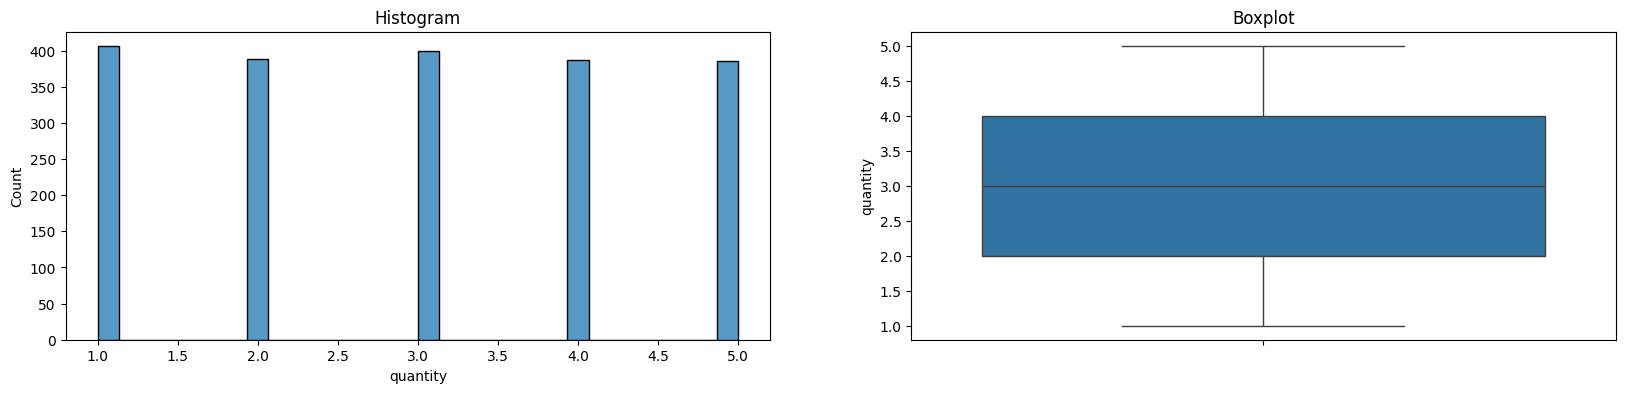

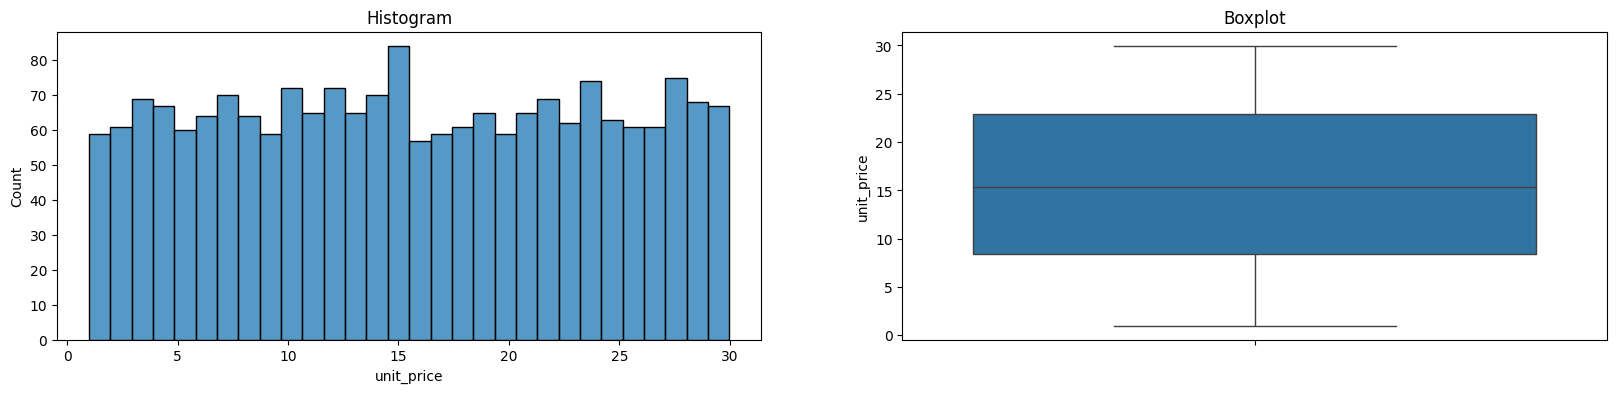

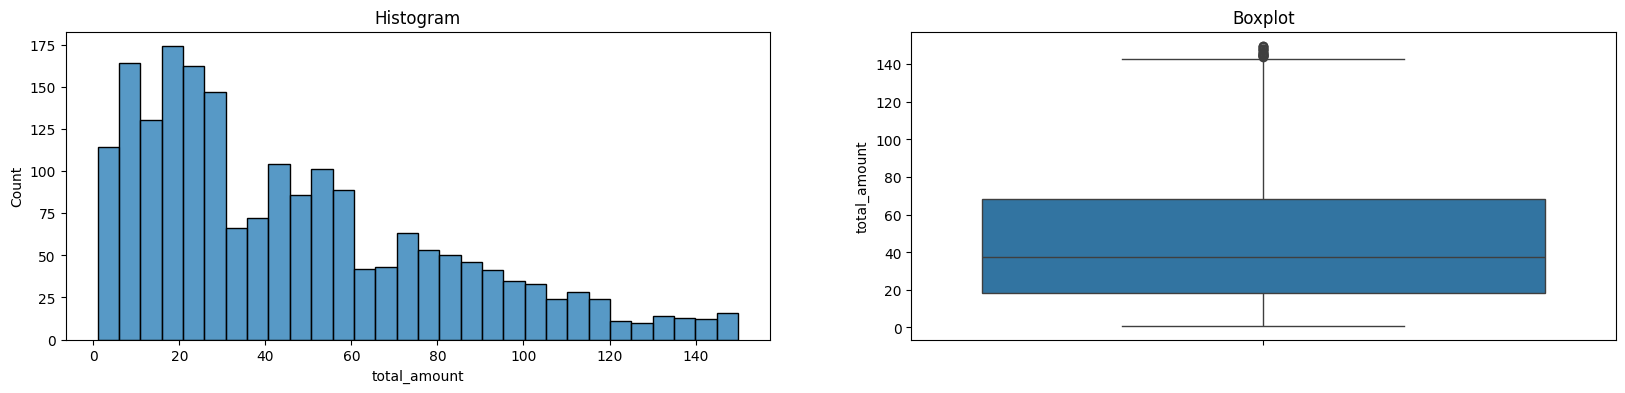

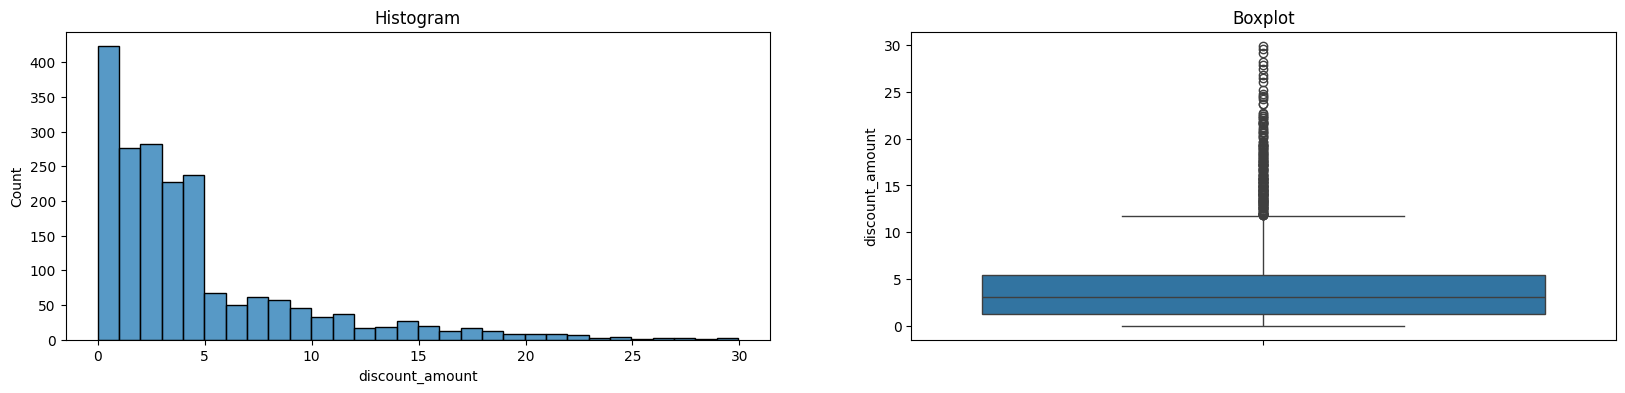

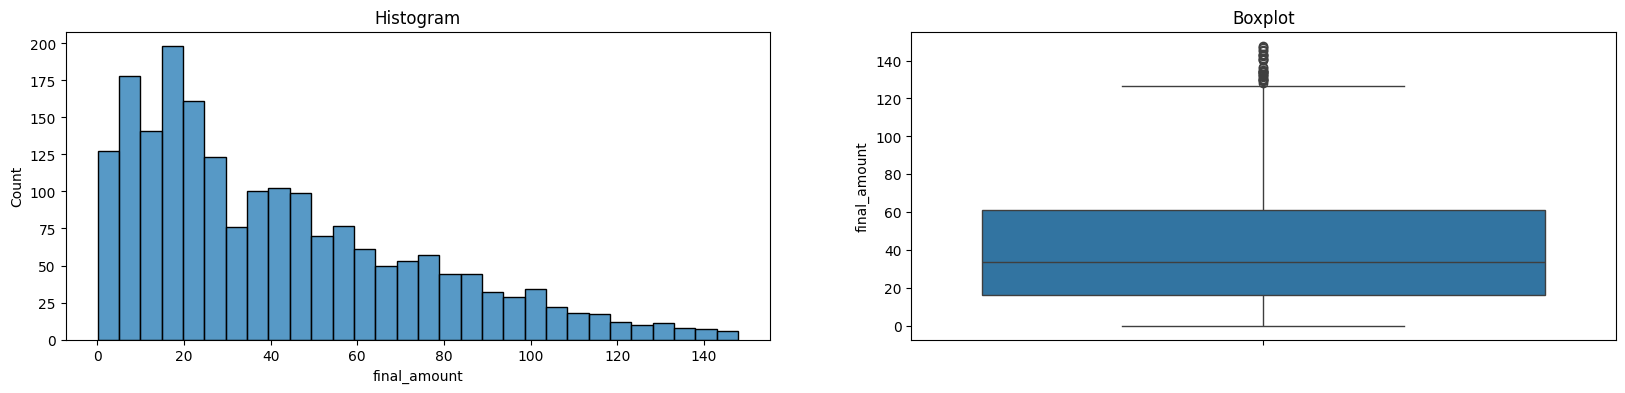

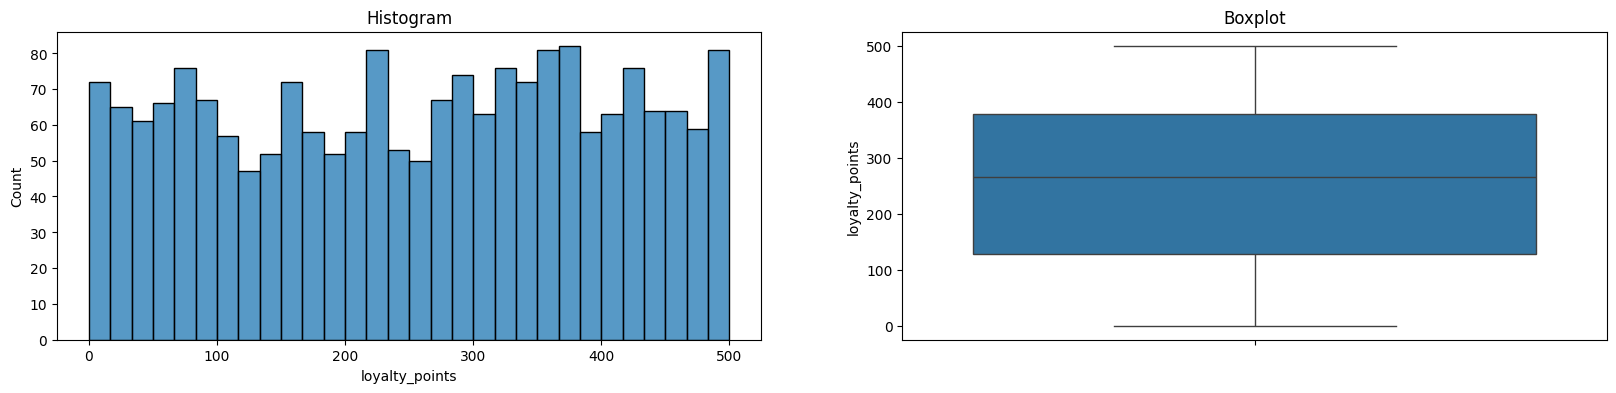

In [ ]:
check_plot(df,features)

Tidak dilakukan handling outlier

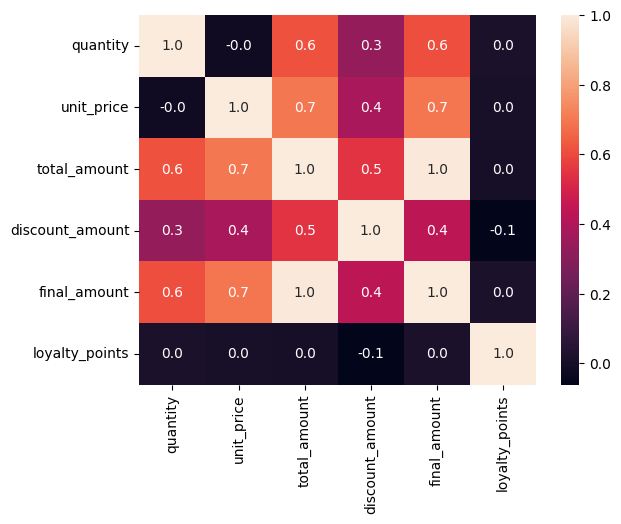

In [ ]:
df_numeric = df.select_dtypes(include=['number'])

sns.heatmap(df_numeric.corr(), annot=True, fmt=".1f")
plt.show()

Note :  

- Analisis matriks korelasi menunjukkan bahwa variabel loyalty_points memiliki korelasi negatif yang sangat lemah terhadap discount_amount (-0,1), sehingga kontribusinya terhadap besaran diskon dapat diabaikan.

- Variabel final_amount memiliki korelasi positif sangat kuat dengan unit_price (0,7), diikuti korelasi positif kuat dengan quantity (0,6), serta korelasi positif sedang dengan discount_amount (0,4).

- Discount_amount menunjukkan korelasi positif sedang dengan quantity (0,3), serta memiliki hubungan positif sedang yang sama (0,4) dengan final_amount dan unit_price. Selain itu, korelasi antara discount_amount dan total_amount termasuk kuat (0,5).

- Variabel total_amount memiliki korelasi sempurna positif dengan final_amount (1,0), korelasi positif sangat kuat dengan unit_price (0,7), korelasi positif kuat dengan quantity (0,6), dan korelasi positif kuat dengan discount_amount (0,5).

- Unit_price berkorelasi positif sangat kuat dengan final_amount dan total_amount (0,7), serta korelasi positif sedang dengan discount_amount (0,4).

- Quantity memiliki korelasi positif kuat dengan final_amount dan total_amount (0,6), serta korelasi positif sedang dengan discount_amount (0,3).

In [ ]:
#export csv
pd.DataFrame(df).to_csv('grocery_chain_data_clean.csv', index=False)